## Annotations
The annotations keyword is used for text annotations in data-coordinates. Pass in a tuple (x, y, text), a vector of annotations, each of which is a tuple of x, y and text. You can position annotations using relative coordinates with the syntax ((px, py), text), where for example px=.25 positions the annotation at 25% of the subplot's axis width. text may be a simple String, or a PlotText object, which can be built with the method text(string, attrs...). This wraps font and color attributes and allows you to set text styling. text may also be a tuple (string, attrs...) of arguments which are passed to Plots.text.

annotate!(ann) is shorthand for plot!(; annotation=ann).

Series annotations are used for annotating individual data points. They require only the annotation; x/y values are computed. Series annotations require either plain Strings or PlotText objects.

In [4]:
using Plots
gr()

Plots.GRBackend()

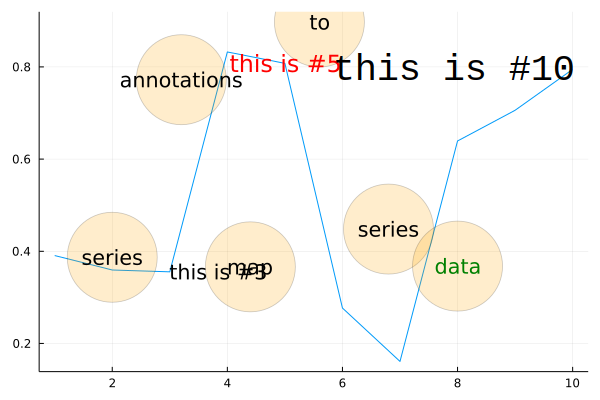

In [5]:
y = rand(10)
plot(y, annotations = (3, y[3], Plots.text("this is #3", :left)), leg = false)
annotate!([(5, y[5], ("this is #5", 16, :red, :center)), (10, y[10], ("this is #10", :right, 20, "courier"))])
scatter!(range(2, stop = 8, length = 6), rand(6), marker = (50, 0.2, :orange), series_annotations = ["series", "annotations", "map", "to", "series", Plots.text("data", :green)])

## Custom Markers
A Plots.Shape is a light wrapper around vertices of a polygon. For supported backends, pass arbitrary polygons as the marker shapes. Note: The center is (0,0) and the size is expected to be rougly the area of the unit circle.

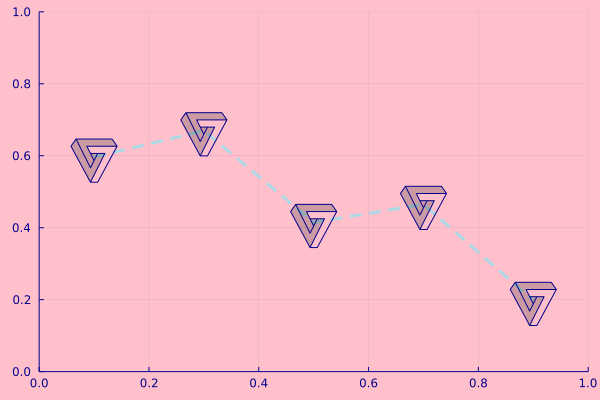

In [6]:
verts = [(-1.0, 1.0), (-1.28, 0.6), (-0.2, -1.4), (0.2, -1.4), (1.28, 0.6), (1.0, 1.0), (-1.0, 1.0), (-0.2, -0.6), (0.0, -0.2), (-0.4, 0.6), (1.28, 0.6), (0.2, -1.4), (-0.2, -1.4), (0.6, 0.2), (-0.2, 0.2), (0.0, -0.2), (0.2, 0.2), (-0.2, -0.6)]
x = 0.1:0.2:0.9
y = 0.7 * rand(5) .+ 0.15
plot(x, y, line = (3, :dash, :lightblue), marker = (Shape(verts), 30, RGBA(0, 0, 0, 0.2)), bg = :pink, fg = :darkblue, xlim = (0, 1), ylim = (0, 1), leg = false)

## Contours
Any value for fill works here. We first build a filled contour from a function, then an unfilled contour from a matrix.

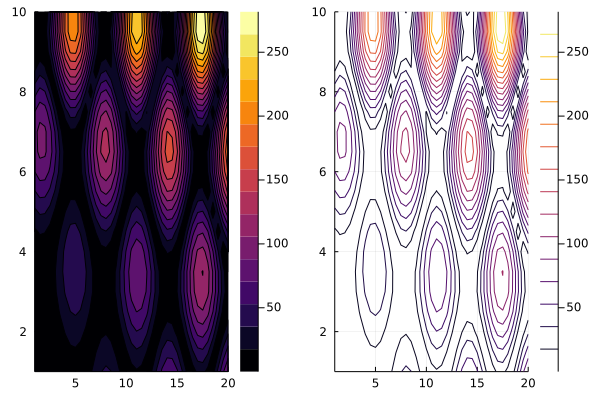

In [7]:
x = 1:0.5:20
y = 1:0.5:10
f(x, y) = begin
        (3x + y ^ 2) * abs(sin(x) + cos(y))
    end
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)
p1 = contour(x, y, f, fill = true)
p2 = contour(x, y, Z)
plot(p1, p2)

## Pie

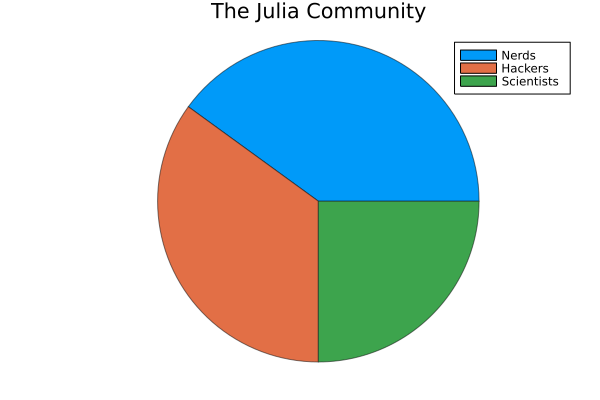

In [8]:
x = ["Nerds", "Hackers", "Scientists"]
y = [0.4, 0.35, 0.25]
pie(x, y, title = "The Julia Community", l = 0.5)

## 3D

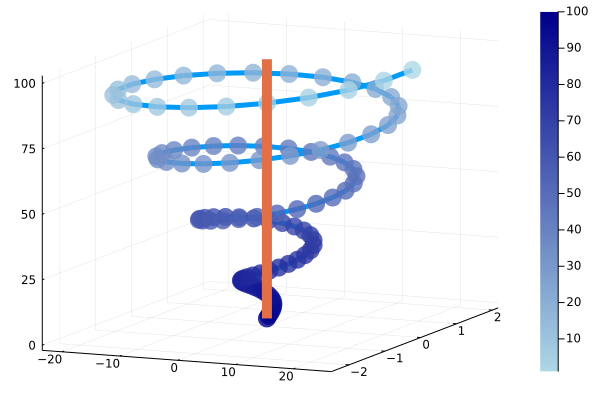

In [9]:
n = 100
ts = range(0, stop = 8π, length = n)
x = ts .* map(cos, ts)
y = (0.1ts) .* map(sin, ts)
z = 1:n
plot(x, y, z, zcolor = reverse(z), m = (10, 0.8, :blues, Plots.stroke(0)), leg = false, cbar = true, w = 5)
plot!(zeros(n), zeros(n), 1:n, w = 10)

## Groups and Subplots

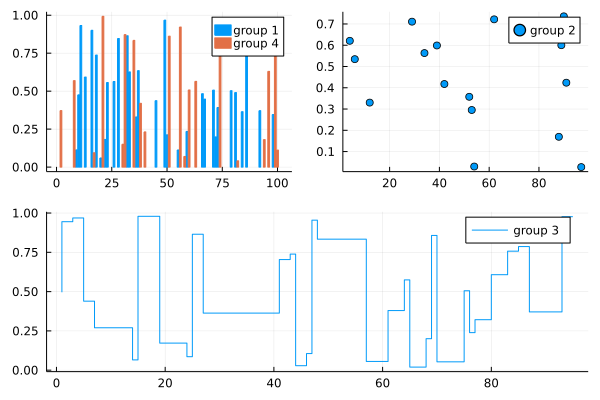

In [10]:
group = rand(map((i->begin
                    "group $(i)"
                end), 1:4), 100)
plot(rand(100), layout = @layout([a b; c]), group = group, linetype = [:bar :scatter :steppre], linecolor = :match)


## Polar Plots

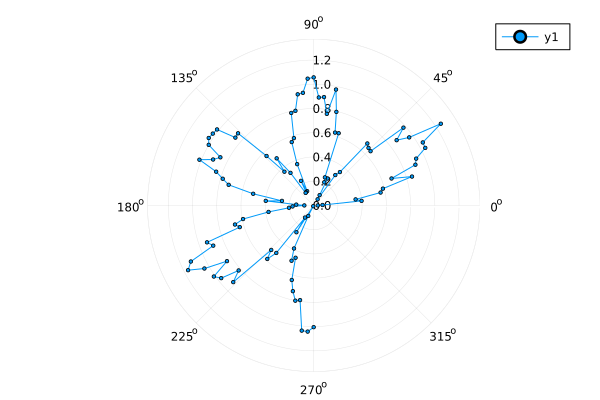

In [11]:
Θ = range(0, stop = 1.5π, length = 100)
r = abs.(0.1 * randn(100) + sin.(3Θ))
plot(Θ, r, proj = :polar, m = 2)

## Heatmap, categorical axes, and aspect_ratio

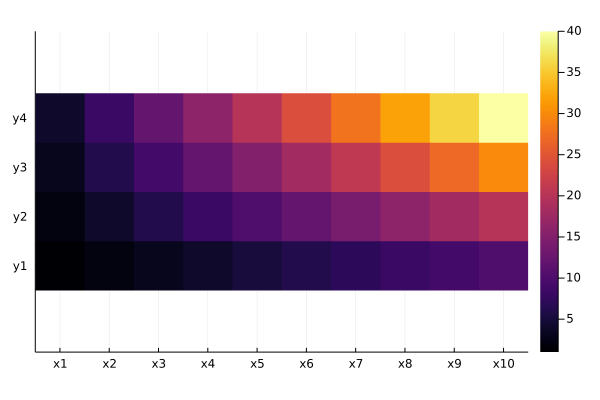

In [12]:
xs = [string("x", i) for i = 1:10]
ys = [string("y", i) for i = 1:4]
z = float((1:4) * reshape(1:10, 1, :))
heatmap(xs, ys, z, aspect_ratio = 1)

## Layouts, margins, label rotation, title location

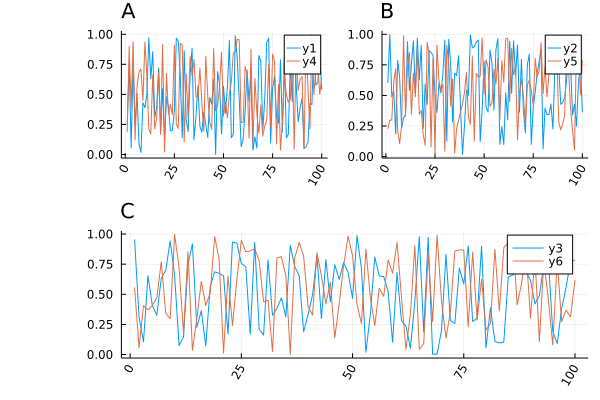

In [13]:
using Plots.PlotMeasures
plot(rand(100, 6), layout = @layout([a b; c]), title = ["A" "B" "C"], titlelocation = :left, left_margin = [20mm 0mm], bottom_margin = 10px, xrotation = 60)

## Animation with subplots
The layout macro can be used to create an animation with subplots.

In [14]:
l = @layout([[a; b] c])
p = plot(plot([sin, cos], 1, ylims = (-1, 1), leg = false), scatter([atan, cos], 1, ylims = (-1, 1.5), leg = false), plot(log, 1, ylims = (0, 2), leg = false), layout = l, xlims = (1, 2π))
anim = Animation()
for x = range(1, stop = 2π, length = 20)
    plot(push!(p, x, Float64[sin(x), cos(x), atan(x), cos(x), log(x)]))
    frame(anim)
end

## Spy
For a matrix mat with unique nonzeros spy(mat) returns a colorless plot. If mat has various different nonzero values, a colorbar is added. The colorbar can be disabled with legend = nothing.

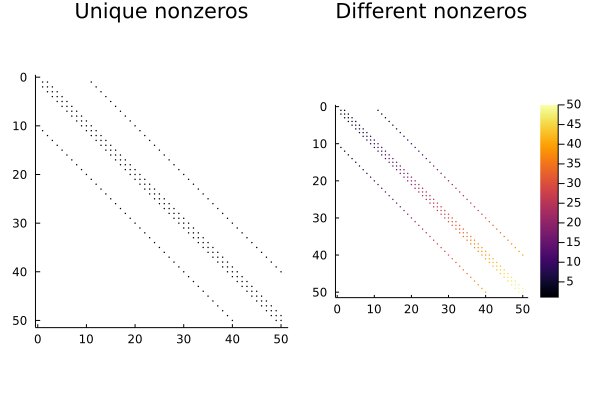

In [15]:
using SparseArrays
a = spdiagm(0 => ones(50), 1 => ones(49), -1 => ones(49), 10 => ones(40), -10 => ones(40))
b = spdiagm(0 => 1:50, 1 => 1:49, -1 => 1:49, 10 => 1:40, -10 => 1:40)
plot(spy(a), spy(b), title = ["Unique nonzeros" "Different nonzeros"])

## Magic grid argument
The grid lines can be modified individually for each axis with the magic grid argument.

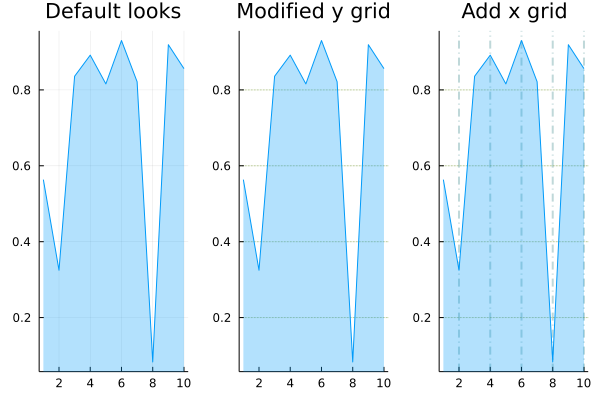

In [16]:
x = rand(10)
p1 = plot(x, title = "Default looks")
p2 = plot(x, grid = (:y, :olivedrab, :dot, 1, 0.9), title = "Modified y grid")
p3 = plot(deepcopy(p2), title = "Add x grid")
xgrid!(p3, :on, :cadetblue, 2, :dashdot, 0.4)
plot(p1, p2, p3, layout = (1, 3), label = "", fillrange = 0, fillalpha = 0.3)

## Framestyle
The style of the frame/axes of a (sub)plot can be changed with the framestyle attribute. The default framestyle is :axes.

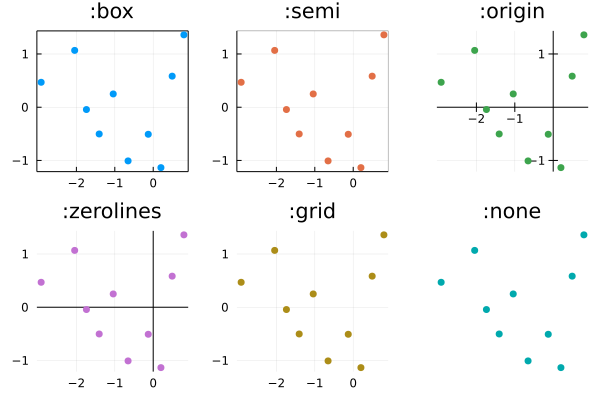

In [17]:
scatter(fill(randn(10), 6), fill(randn(10), 6), framestyle = [:box :semi :origin :zerolines :grid :none], title = [":box" ":semi" ":origin" ":zerolines" ":grid" ":none"], color = permutedims(1:6), layout = 6, label = "", markerstrokewidth = 0, ticks = -2:2)


## Lines and markers with varying colors
You can use the line_z and marker_z properties to associate a color with each line segment or marker in the plot.

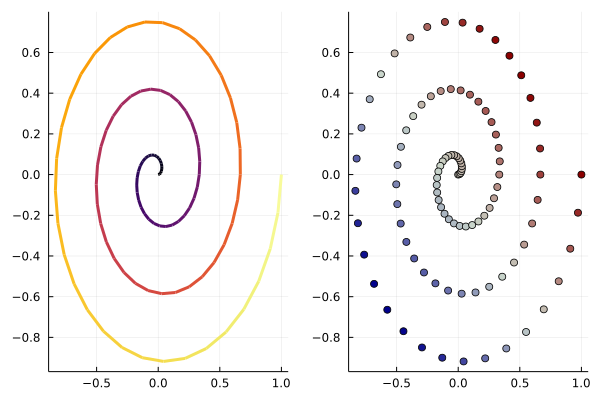

In [18]:
t = range(0, stop = 1, length = 100)
θ = (6π) .* t
x = t .* cos.(θ)
y = t .* sin.(θ)
p1 = plot(x, y, line_z = t, linewidth = 3, legend = false)
p2 = scatter(x, y, marker_z = (+), color = :bluesreds, legend = false)
plot(p1, p2)

## Portfolio Composition maps
see: http://stackoverflow.com/a/37732384/5075246


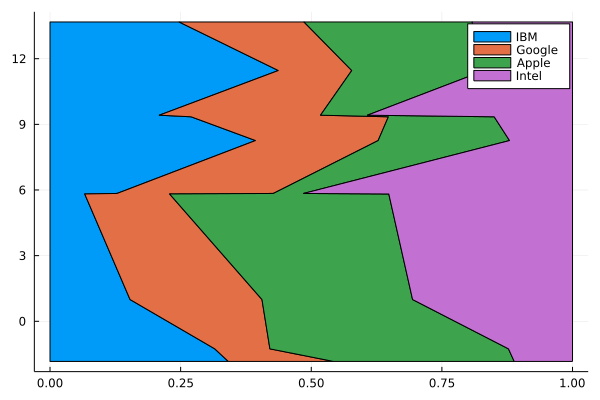

In [19]:
using Random
Random.seed!(111)
tickers = ["IBM", "Google", "Apple", "Intel"]
N = 10
D = length(tickers)
weights = rand(N, D)
weights ./= sum(weights, dims = 2)
returns = sort!((1:N) + D * randn(N))
portfoliocomposition(weights, returns, labels = permutedims(tickers))

## Ribbons
Ribbons can be added to lines via the ribbon keyword; you can pass a tuple of arrays (upper and lower bounds), a single Array (for symmetric ribbons), a Function, or a number.

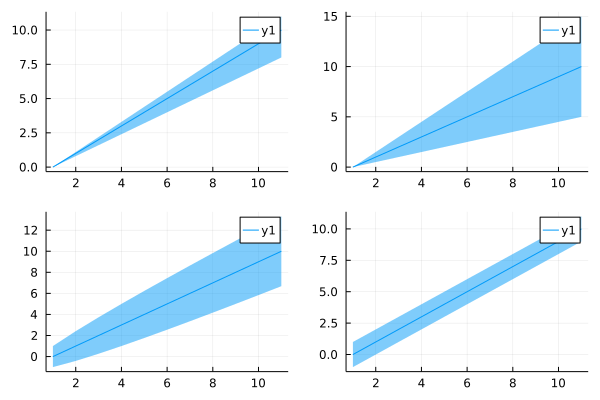

In [20]:
plot(plot(0:10; ribbon = (LinRange(0, 2, 11), LinRange(0, 1, 11))), plot(0:10; ribbon = 0:0.5:5), plot(0:10; ribbon = sqrt), plot(0:10; ribbon = 1))